[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Les mots les plus fréquents sont :
nation: 5
ainsi: 4
génération: 4
a: 3
cette: 3
temps: 3
amérique: 3
doit: 3
trop: 3
jour: 3


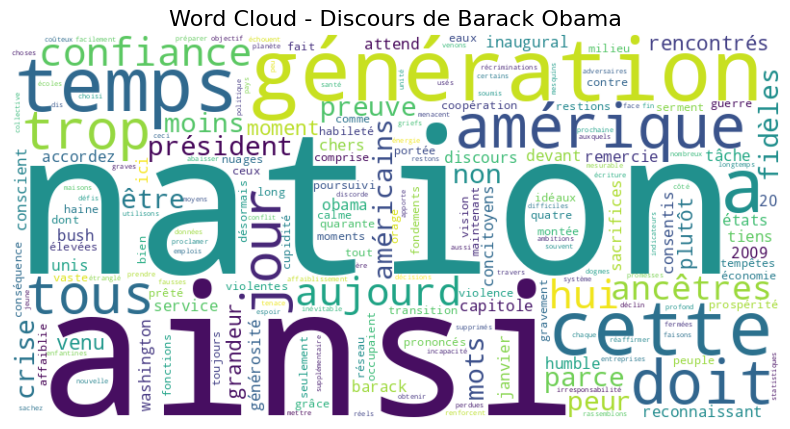

In [7]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import pandas as pd


# Télécharger les stop words en français
nltk.download('stopwords')

# Texte fourni
text = '''Discours inaugural de Barack Obama
Capitole des États-Unis, Washington D.C.
20 janvier 2009

Mes chers concitoyens,

Je me tiens ici aujourd’hui, humble devant la tâche qui nous attend, reconnaissant de la confiance que vous m’accordez, conscient des sacrifices consentis par nos ancêtres. Je remercie le président Bush pour son service à notre nation, ainsi que pour la générosité et la coopération dont il a fait preuve tout au long de cette transition.

Quarante-quatre Américains ont désormais prêté serment comme président. Les mots ont été prononcés en temps de montée des eaux de prospérité et de calme, ainsi qu’en temps de nuages d’orage et de tempêtes violentes. À ces moments, l’Amérique a poursuivi non seulement grâce à l’habileté ou la vision de ceux qui occupaient des fonctions élevées, mais parce que nous, le peuple, restions fidèles aux idéaux de nos ancêtres et fidèles à nos fondements.

C’est ainsi qu’il en a toujours été. C’est ainsi qu’il doit en être avec cette génération d’Américains.

Que nous soyons au milieu d’une crise, bien comprise maintenant. Notre nation est en guerre, contre un réseau de violence et de haine d’une vaste portée. Notre économie est gravement affaiblie, conséquence de la cupidité et de l’irresponsabilité de certains, mais aussi de notre incapacité collective à prendre des décisions difficiles et à préparer la nation à une nouvelle ère. Des maisons ont été perdues, des emplois supprimés, des entreprises fermées. Notre système de santé est trop coûteux, nos écoles échouent trop souvent, et chaque jour apporte une preuve supplémentaire que les moyens que nous utilisons pour obtenir de l’énergie renforcent nos adversaires et menacent notre planète.

Ce sont les indicateurs de la crise, soumis à des données et des statistiques. Moins mesurable mais non moins profond est un affaiblissement de la confiance à travers notre pays - une peur tenace que le déclin de l’Amérique est inévitable, et que la prochaine génération doit abaisser ses ambitions.

Aujourd’hui, je vous dis que les défis auxquels nous faisons face sont réels. Ils sont graves et nombreux. Ils ne seront pas facilement rencontrés ou en peu de temps. Mais sachez ceci, Amérique - ils seront rencontrés.

En ce jour, nous nous rassemblons parce que nous avons choisi l’espoir plutôt que la peur, l’unité d’objectif plutôt que le conflit et la discorde.

En ce jour, nous venons proclamer la fin des griefs mesquins et des fausses promesses, des récriminations et des dogmes usés, qui ont trop longtemps étranglé notre politique. Nous restons une nation jeune, mais dans les mots de l’Écriture, le moment est venu de mettre de côté les choses enfantines. Le moment est venu de réaffirmer notre esprit d’endurance ; de choisir notre meilleure histoire ; de porter ce précieux cadeau, cette noble idée, transmise de génération en génération : la promesse divine que tous sont égaux, tous sont libres, et tous méritent une chance de poursuivre leur bonheur dans une pleine mesure.

Dans la réaffirmation de la grandeur de notre nation, nous comprenons que la grandeur ne nous est jamais donnée. Elle doit être gagnée.'''

# Prétraitement du texte
# Retirer la ponctuation et convertir en minuscules
text = re.sub(r'[\W_]+', ' ', text.lower())

# Charger les stop words français
stop_words = set(stopwords.words('french'))

# Tokenizer (séparer en mots)
words = text.split()

# Filtrer les stop words
filtered_words = [word for word in words if word not in stop_words]

# Compter la fréquence des mots
word_counts = Counter(filtered_words)
df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])
print(df)
# Afficher les mots les plus fréquents
print("Les mots les plus fréquents sont :")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Générer le Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Afficher le Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Discours de Barack Obama', fontsize=16)
plt.show()


In [8]:
import pandas as pd
import re

# Texte fourni
text = """<rec><name>Prashant Rao</name><sex>Male</sex><age>35</age></rec>
<rec><name>Seema R.</name><sex>Female</sex><age>41</age></rec>
<rec><name>Satish Mane</name><sex>Male</sex><age>29</age></rec>
<rec><name>Subrato Roy</name><sex>Male</sex><age>26</age></rec>
<rec><name>Jeremiah J.</name><sex>Male</sex><age>35</age></rec>"""

# Extraire les informations
pattern = r"<name>(.*?)</name><sex>(.*?)</sex><age>(\d+)</age>"
matches = re.findall(pattern, text)

# Créer un DataFrame
data = pd.DataFrame(matches, columns=["Name", "Sex", "Age"])

# Convertir la colonne 'Age' en type numérique
data['Age'] = data['Age'].astype(int)

# Afficher le DataFrame
print("Tableau des informations extraites :")
print(data)

Tableau des informations extraites :
           Name     Sex  Age
0  Prashant Rao    Male   35
1      Seema R.  Female   41
2   Satish Mane    Male   29
3   Subrato Roy    Male   26
4   Jeremiah J.    Male   35


In [9]:
def map_reduce_word_count(data_blocks):
    # Mapper : Diviser chaque bloc en mots et associer à chaque mot le nombre 1
    mapped = []
    for block in data_blocks:
        mapped.extend([(word, 1) for word in block])

    # Reducer : Compter le nombre total pour chaque mot
    reduced = {}
    for word, count in mapped:
        reduced[word] = reduced.get(word, 0) + count

    return reduced

# Blocs de données
data_block1 = ["spark", "map", "reduce", "spark", "data"]
data_block2 = ["big", "data", "spark", "analysis", "map"]
data_block3 = ["reduce", "map", "data", "science", "spark"]

# Exécuter la fonction MapReduce
word_counts = map_reduce_word_count([data_block1, data_block2, data_block3])

# Afficher les résultats
print("Résultat du comptage des mots :")
print(word_counts)

Résultat du comptage des mots :
{'spark': 4, 'map': 3, 'reduce': 2, 'data': 3, 'big': 1, 'analysis': 1, 'science': 1}


In [10]:
def map_reduce_stats(data_blocks):
    # Mapper : Récolter toutes les valeurs numériques
    mapped = []
    for block in data_blocks:
        mapped.extend(block)

    # Calculer la somme et le nombre d'éléments (pour la moyenne)
    total_sum = sum(mapped)
    count = len(mapped)
    mean = total_sum / count

    # Calculer la variance
    variance = sum((x - mean) ** 2 for x in mapped) / count

    # Calculer la médiane
    sorted_data = sorted(mapped)
    mid = count // 2
    if count % 2 == 0:
        median = (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        median = sorted_data[mid]

    return mean, variance, median

# Blocs de données numériques pour les tests
numerical_block1 = [35, 41, 29]
numerical_block2 = [26, 35]

# Calculer les statistiques sur chaque bloc séparément
mean1, variance1, median1 = map_reduce_stats([numerical_block1])
mean2, variance2, median2 = map_reduce_stats([numerical_block2])

# Calculer les statistiques sur l'ensemble des blocs combinés
mean_combined, variance_combined, median_combined = map_reduce_stats([numerical_block1 + numerical_block2])

# Afficher les résultats
print("Statistiques par bloc :")
print(f"Bloc 1 - Moyenne: {mean1}, Variance: {variance1}, Médiane: {median1}")
print(f"Bloc 2 - Moyenne: {mean2}, Variance: {variance2}, Médiane: {median2}")

print("Statistiques combinées :")
print(f"Moyenne: {mean_combined}, Variance: {variance_combined}, Médiane: {median_combined}")


Statistiques par bloc :
Bloc 1 - Moyenne: 35.0, Variance: 24.0, Médiane: 35
Bloc 2 - Moyenne: 30.5, Variance: 20.25, Médiane: 30.5
Statistiques combinées :
Moyenne: 33.2, Variance: 27.359999999999996, Médiane: 35
